<a href="https://colab.research.google.com/github/rishi93/deep_learning/blob/master/small_conv_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [0]:
cifar10 = keras.datasets.cifar10

In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


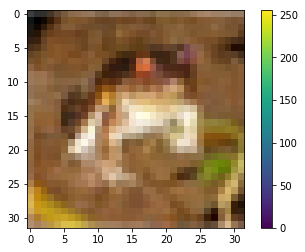

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

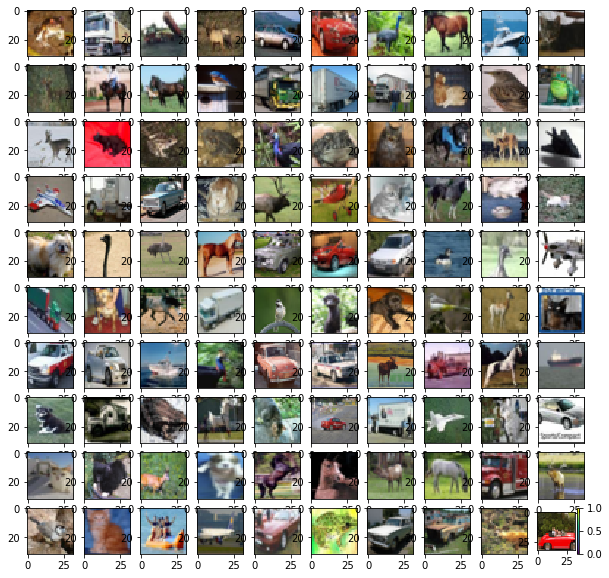

In [0]:
plt.figure(figsize=(10, 10))

for i in range(0, 100):
    plt.subplot(10, 10, i+1)
    plt.imshow(train_images[i])
plt.colorbar()
plt.show()

In [120]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu, input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation=keras.activations.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 8, 8, 64)        

In [0]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [122]:
model.fit(train_images, train_labels, epochs = 25)

Epoch 1/25
50000/50000 [==============================] - 36s 715us/sample - loss: 1.6563 - accuracy: 0.3895
Epoch 2/25
50000/50000 [==============================] - 32s 632us/sample - loss: 1.2076 - accuracy: 0.5666
Epoch 3/25
50000/50000 [==============================] - 31s 629us/sample - loss: 1.0365 - accuracy: 0.6335
Epoch 4/25
50000/50000 [==============================] - 31s 624us/sample - loss: 0.9399 - accuracy: 0.6696
Epoch 5/25
50000/50000 [==============================] - 31s 628us/sample - loss: 0.8822 - accuracy: 0.6921
Epoch 6/25
50000/50000 [==============================] - 31s 627us/sample - loss: 0.8368 - accuracy: 0.7092
Epoch 7/25
50000/50000 [==============================] - 31s 630us/sample - loss: 0.7970 - accuracy: 0.7224
Epoch 8/25
50000/50000 [==============================] - 32s 643us/sample - loss: 0.7753 - accuracy: 0.7303
Epoch 9/25
50000/50000 [==============================] - 32s 632us/sample - loss: 0.7506 - accuracy: 0.7392
Epoch 10/25
50000/5

In [123]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

10000/10000 [==============================] - 3s 269us/sample - loss: 0.6493 - accuracy: 0.7792
0.7792
